In [1]:
import os
import numpy as np

# read image
from imageio import imread

# plotting pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
IMG_WIDTH = 300
IMG_HEIGHT = 280
CHANNELS = 3

In [3]:
def show_two_images(img, mask):
    fig = plt.figure()

    # image
    fig.add_subplot(121)
    plt.title('image')
    plt.imshow(img)

    # mask
    fig.add_subplot(122)
    plt.title('mask')
    plt.imshow(mask)
    
    plt.show()

In [4]:
root_dir = "./raw/"
raw_mask_dir = os.path.join(root_dir, "masks")
raw_img_dir = os.path.join(root_dir, "images")

In [5]:
list_of_mask_file_names = os.listdir(raw_mask_dir)
list_of_img_file_names = os.listdir(raw_img_dir)
total_instances_n = len(list_of_mask_file_names)
print(len(list_of_mask_file_names),len(list_of_img_file_names))

75 75


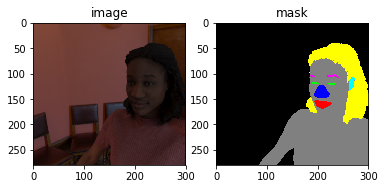

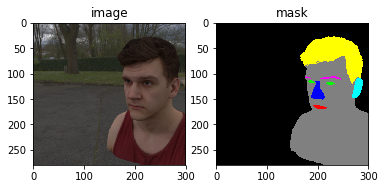

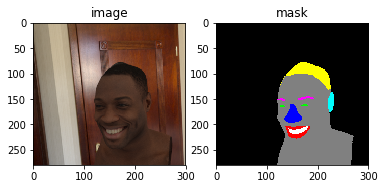

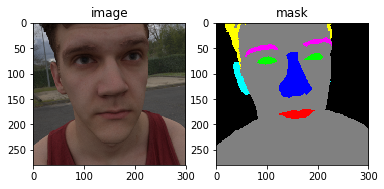

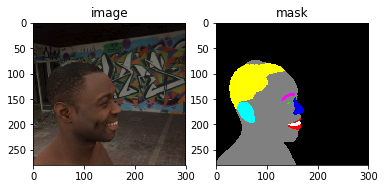

In [6]:
final_imgs = np.zeros((total_instances_n, IMG_HEIGHT, IMG_WIDTH, CHANNELS), dtype='float32')
temp_masks = np.zeros((total_instances_n, IMG_HEIGHT, IMG_WIDTH, CHANNELS), dtype='float32')
for i, img_id in enumerate(list_of_img_file_names):
    img = imread(os.path.join(raw_img_dir, list_of_img_file_names[i]))
    mask = imread(os.path.join(raw_mask_dir, list_of_mask_file_names[i]))
    final_imgs[i] = img
    temp_masks[i] = mask
    if i % 15 == 0:
        show_two_images(img, mask)

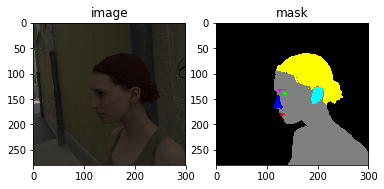

In [7]:
tt = temp_masks[3]
ss = final_imgs[3]
show_two_images(ss.astype("int"), tt.astype("int"))

In [8]:
# this is wildly inefficient but will work for this small dataset
# this encoding will alow for one hot encoding
final_masks = np.zeros((total_instances_n, IMG_HEIGHT, IMG_WIDTH), dtype='float32')
for i,m in enumerate(temp_masks):
    for j,row in enumerate(m):
        for k,pix in enumerate(row):
            # background
            if (pix==np.asarray([0,0,0],dtype='float32')).all():
                final_masks[i][j][k] = 0
            
            # generalface
            elif (pix==np.asarray([128,128,128],dtype='float32')).all():
                final_masks[i][j][k] = 1
            
            # eyes
            elif (pix==np.asarray([0,255,0],dtype='float32')).all():
                final_masks[i][j][k] = 2
                
            # lips
            elif (pix==np.asarray([255,0,0],dtype='float32')).all():
                final_masks[i][j][k] = 3
                
            # nose
            elif (pix==np.asarray([0,0,255],dtype='float32')).all():
                final_masks[i][j][k] = 4
                
            # ears
            elif (pix==np.asarray([0,255,255],dtype='float32')).all():
                final_masks[i][j][k] = 5
                
            # eyebrows
            elif (pix==np.asarray([255,0,255],dtype='float32')).all():
                final_masks[i][j][k] = 6
                
            # teeth
            elif (pix==np.asarray([255,255,255],dtype='float32')).all():
                final_masks[i][j][k] = 7
            
            # hair
            elif (pix==np.asarray([255,255,0],dtype='float32')).all():
                final_masks[i][j][k] = 8
                
            else:
                print("unknown pixel value")
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


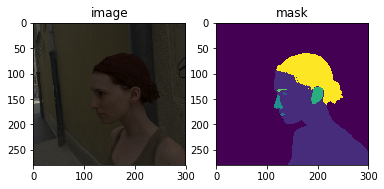

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [9]:
xx = final_masks[3]
yy = final_imgs[3]
show_two_images(yy.astype("int"), xx.astype("int"))
for i in xx:
    print(i)

In [10]:
# helper to create dirs if they don't already exist
def maybe_create_dir(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
        print("{} created".format(dir_path))
    else:
        print("{} already exists".format(dir_path))

In [11]:
maybe_create_dir("./raw/numpy")

./raw/numpy created


In [12]:
## save images
np.save('./raw/numpy/' +  'images.npy', final_imgs)
np.save('./raw/numpy/' + 'masks.npy', final_masks.astype(np.int32))